# Google Play Store Downloads Analysis Portfolio Project

## 1. Project Overview
This project analyzes Google Play Store app data to uncover **trends in app categories, ratings, downloads, and pricing**. The objective is to gain insights into the app market, identify popular categories, understand user preferences, and analyze the relationship between app ratings, reviews, and downloads.

## 2. Introduction
The Google Play Store hosts a vast number of apps across multiple categories. Understanding **which apps perform well, how pricing impacts downloads, and what factors influence ratings** can provide valuable insights for app developers and marketers. This analysis aims to explore **user engagement patterns, market trends, and key success factors** for apps on the Google Play Store.

## 3. Data Cleaning
### 3.1 Dataset Overview
- **Source:** Google Play Store dataset containing app details.
- **Key Columns:**
  - App Name
  - Category
  - Rating
  - Number of Installs
  - Price
  - Reviews Count
  - Minimum Android Version
  - Developer Website

### 3.2 Data Cleaning Process
- **Handled missing values** in columns like `Rating`, `Rating Count`, `Minimum Android`, and `Developer Website`.
- **Converted data types** for `Installs` and `Price` to numeric formats for accurate analysis.
- **Removed duplicates and outliers** to ensure data consistency and accuracy.

## 4. Exploratory Data Analysis (EDA)
### 4.1 Distribution of App Ratings
- Visualized app ratings using **histograms and box plots**.
- Found that **most apps have ratings between 4.0 and 4.5**, indicating generally positive user feedback.

### 4.2 Category-wise Distribution of Apps
- Analyzed app distribution across different categories.
- Identified that **'Games' and 'Tools' are the most popular categories**, having the highest number of apps.

### 4.3 Price vs. Downloads Analysis
- Explored the relationship between **app price and number of downloads**.
- Found that **free apps dominate the market**, while paid apps tend to have slightly better ratings.

### 4.4 Reviews and Ratings Correlation
- Analyzed the correlation between **number of reviews and downloads**.
- Identified that **apps with more reviews tend to have higher downloads**, indicating strong user engagement.

### 4.5 Sentiment Analysis of App Reviews
- Performed **sentiment analysis** to understand user opinions.
- Identified key themes in user feedback, highlighting areas where apps can improve.


In [1]:
# Executing a data analysis step
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Loading dataset into a DataFrame
import opendatasets as od
dataset_url='https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps'
od.download(dataset_url)

Skipping, found downloaded files in "./google-playstore-apps" (use force=True to force download)


In [2]:
# Loading dataset into a DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Google-Playstore.csv')
df.head(5)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [4]:
# Executing a data analysis step
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [5]:
# Executing a data analysis step
df.shape


(2312944, 24)

In [6]:
# Executing a data analysis step
df.info

<bound method DataFrame.info of                                                   App Name  \
0                                                  Gakondo   
1                                      Ampere Battery Info   
2                                                   Vibook   
3        Smart City Trichy Public Service Vehicles 17UC...   
4                                                  GROW.me   
...                                                    ...   
2312939                                           大俠客—熱血歸來   
2312940                                         ORU Online   
2312941                                     Data Structure   
2312942                                        Devi Suktam   
2312943                       Biliyor Musun - Sonsuz Yarış   

                                       App Id       Category  Rating  \
0                         com.ishakwe.gakondo      Adventure     0.0   
1                  com.webserveis.batteryinfo          Tools     4.4   
2      

In [7]:
# Handling missing values in the dataset
df.isnull().sum().sort_values(ascending= False)

Developer Website    760835
Privacy Policy       420953
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  2
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [8]:
# Executing a data analysis step
%matplotlib inline

In [9]:
# Executing a data analysis step
import matplotlib

Text(0.5, 1.0, 'Null values')

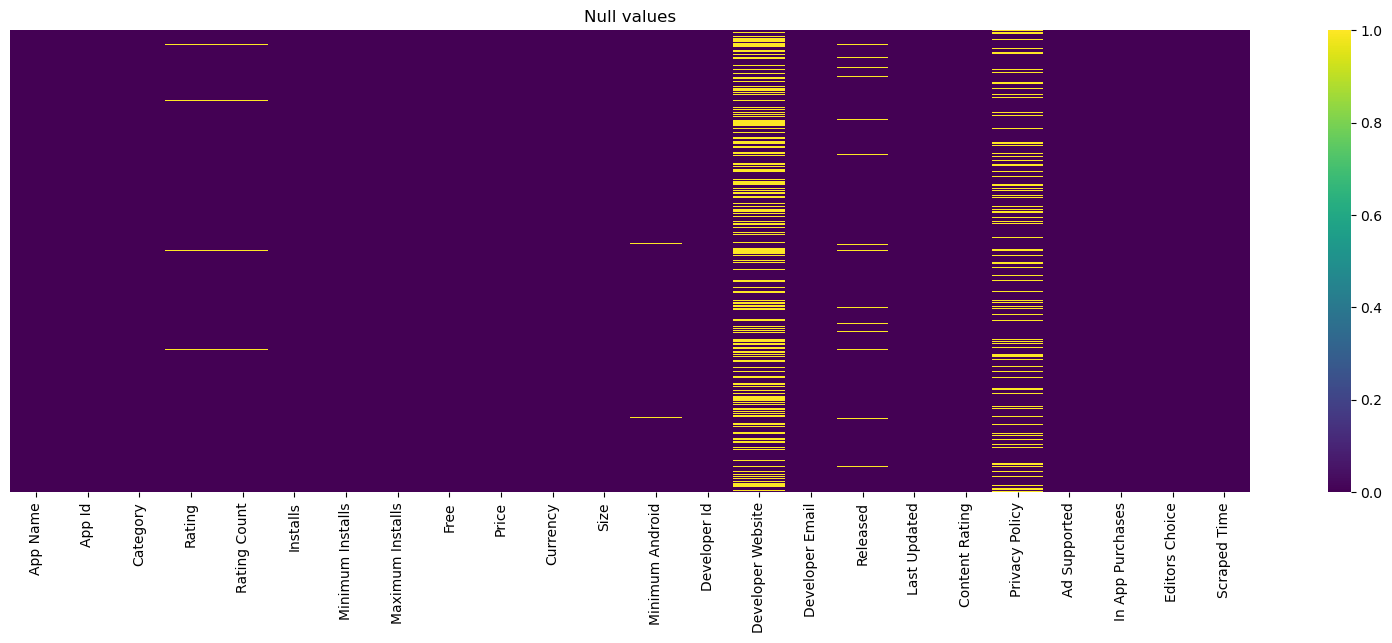

In [10]:
# Handling missing values in the dataset
plt.rcParams['figure.figsize']=(20,6)
sns.heatmap(df.isnull(),yticklabels= False, cmap = 'viridis')
plt.title('Null values')

In [11]:
# Handling missing values in the dataset
missing_percentage = df.isnull().sum().sort_values(ascending = False)/len(df)
missing_percentage

Developer Website    3.289466e-01
Privacy Policy       1.819988e-01
Released             3.071972e-02
Rating               9.893452e-03
Rating Count         9.893452e-03
Minimum Android      2.823242e-03
Size                 8.474049e-05
Currency             5.836717e-05
Installs             4.626139e-05
Minimum Installs     4.626139e-05
Developer Id         1.426753e-05
Developer Email      1.340283e-05
App Name             8.646988e-07
App Id               0.000000e+00
Price                0.000000e+00
Free                 0.000000e+00
Maximum Installs     0.000000e+00
Last Updated         0.000000e+00
Content Rating       0.000000e+00
Category             0.000000e+00
Ad Supported         0.000000e+00
In App Purchases     0.000000e+00
Editors Choice       0.000000e+00
Scraped Time         0.000000e+00
dtype: float64

In [12]:
# Executing a data analysis step
missing_percentage = missing_percentage[missing_percentage != 0]

In [13]:
# Executing a data analysis step
missing_percentage

Developer Website    3.289466e-01
Privacy Policy       1.819988e-01
Released             3.071972e-02
Rating               9.893452e-03
Rating Count         9.893452e-03
Minimum Android      2.823242e-03
Size                 8.474049e-05
Currency             5.836717e-05
Installs             4.626139e-05
Minimum Installs     4.626139e-05
Developer Id         1.426753e-05
Developer Email      1.340283e-05
App Name             8.646988e-07
dtype: float64

In [14]:
# Executing a data analysis step
missing_percentage!=0

Developer Website    True
Privacy Policy       True
Released             True
Rating               True
Rating Count         True
Minimum Android      True
Size                 True
Currency             True
Installs             True
Minimum Installs     True
Developer Id         True
Developer Email      True
App Name             True
dtype: bool

<Axes: >

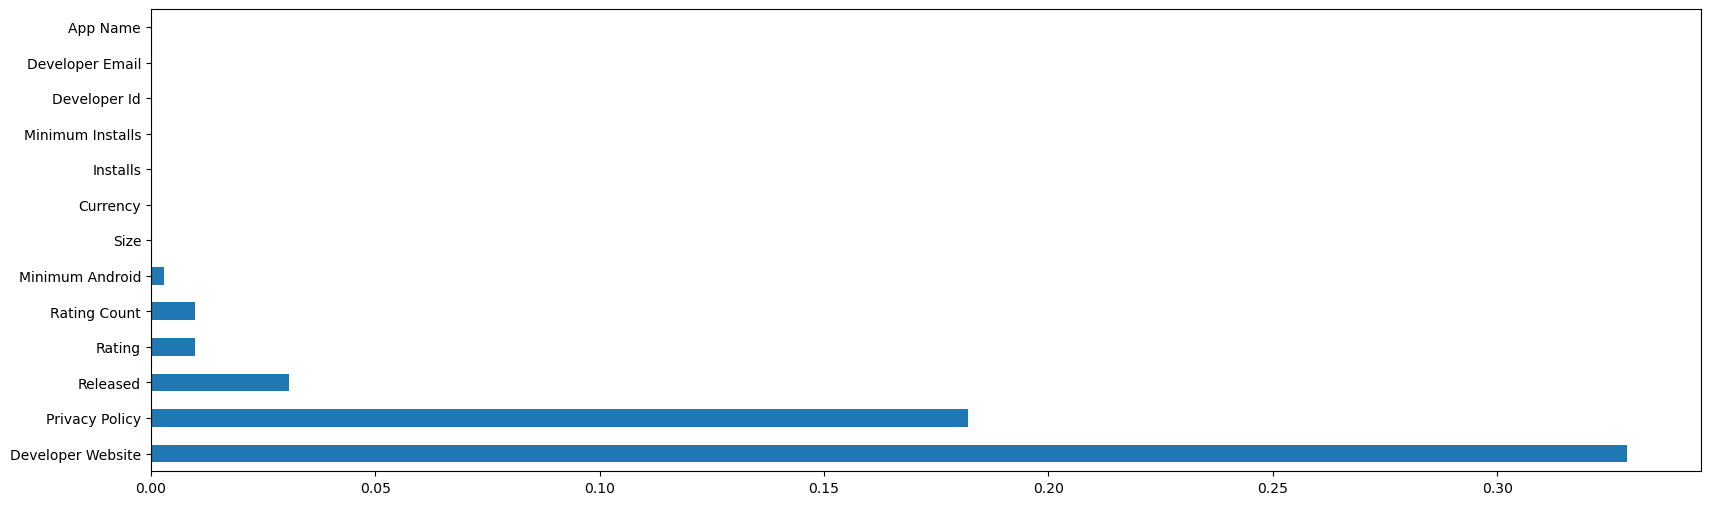

In [15]:
# Generating visualizations
plt.figure(figsize=(20,6))
missing_percentage.plot(kind='barh')

In [16]:
# Executing a data analysis step
len(df)

2312944

In [69]:
# Handling missing values in the dataset
df.dropna(subset=['Size','Currency','Installs','Minimum Installs','Developer Id','Developer Email'],inplace=True)

In [18]:
# Executing a data analysis step
df

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,...,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,...,http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,...,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,...,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


In [19]:
# Executing a data analysis step
boolean=df['App Name'].duplicated().any()
boolean

True

In [20]:
# Handling missing values in the dataset
df['App Name'].isnull().sum()

2

In [21]:
# Handling missing values in the dataset
df.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22572
Rating Count          22572
Installs                  0
Minimum Installs          0
Maximum Installs          0
Free                      0
Price                     0
Currency                  0
Size                      0
Minimum Android        6530
Developer Id              0
Developer Website    760717
Developer Email           0
Released              70748
Last Updated              0
Content Rating            0
Privacy Policy       420846
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [22]:
# Aggregating and summarizing data
df['App Name'].value_counts()

Tic Tac Toe                     382
Calculator                      261
Flashlight                      256
BMI Calculator                  201
Age Calculator                  190
                               ... 
Foodiz Resto                      1
Astra OtoReward                   1
MedTerm Dictionary                1
Urban garden and sowing.          1
Biliyor Musun - Sonsuz Yarış      1
Name: App Name, Length: 2177593, dtype: int64

In [23]:
# Executing a data analysis step
df[df['App Name'] == 'Tic Tac Toe']


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
3918,Tic Tac Toe,com.dev.atte.tic_tac_toe,Puzzle,0.0,0.0,10+,10.0,30,True,0.0,...,https://ne2ad32ee.app-ads-txt.com,dev.atte.francois@gmail.com,"May 18, 2018","May 18, 2018",Everyone,NaN,True,False,False,2021-06-15 20:23:22
13758,Tic Tac Toe,com.md.tictactoe,Board,0.0,0.0,10+,10.0,31,True,0.0,...,NaN,msms.zaman@gmail.com,"Nov 2, 2020","Nov 18, 2020",Everyone,https://smartdailytools.blogspot.com/2020/09/p...,True,False,False,2021-06-15 20:32:58
25351,Tic Tac Toe,com.sthirumuru.tictactoenew,Board,4.2,11.0,"5,000+",5000.0,6379,True,0.0,...,NaN,sundeep.thirumuru@gmail.com,"Apr 13, 2021","Jun 03, 2021",Everyone,NaN,True,False,False,2021-06-15 20:44:27
28142,Tic Tac Toe,com.fsk00x.TicTacToe,Board,0.0,0.0,500+,500.0,922,True,0.0,...,NaN,devmethyl@outlook.com,"Feb 13, 2020","Feb 13, 2020",Everyone,NaN,True,False,False,2021-06-15 20:47:17
30962,Tic Tac Toe,net.snatchdreams.tictactoe,Puzzle,0.0,0.0,10+,10.0,38,True,0.0,...,https://www.snatchdreams.net,snatchdreams@gmail.com,"Jul 16, 2017","Oct 16, 2019",Everyone,https://www.snatchdreams.net/privacy/tic-tac-toe/,True,False,False,2021-06-15 20:50:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272773,Tic Tac Toe,com.tictactoe.MobileAppsPro,Board,3.8,9269.0,"500,000+",500000.0,800662,True,0.0,...,NaN,smartyka@gmail.com,"Jan 9, 2015","May 20, 2015",Everyone,http://mobileappspro.yolasite.com,True,False,False,2021-06-16 12:23:56
2281376,Tic Tac Toe,com.erjainam.tictactoe.release,Board,0.0,0.0,50+,50.0,50,True,0.0,...,https://erjainam.com,engineerjainam@gmail.com,"Sep 2, 2018","Sep 02, 2018",Everyone,https://docs.google.com/document/d/1Tyi5D3VxZu...,True,False,False,2021-06-16 12:31:30
2282023,Tic Tac Toe,com.swapworld.tic_tac_toe,Board,4.7,7.0,10+,10.0,34,True,0.0,...,http://prudhvikchirunomula.pythonanywhere.com/,prudhvik.1996@gmail.com,"Sep 4, 2019","Sep 17, 2019",Everyone,NaN,False,False,False,2021-06-16 12:32:05
2299121,Tic Tac Toe,com.infuse.tictactoe,Board,4.8,20.0,100+,100.0,462,True,0.0,...,http://www.infuseapps.com,infuseandroidapps@gmail.com,"Jan 18, 2015","Jan 18, 2015",Everyone,NaN,True,False,False,2021-06-16 12:47:11


In [24]:
# Executing a data analysis step
df['App Id'].duplicated().any()

False

In [25]:
# Executing a data analysis step
df['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [33]:
# Executing a data analysis step
df['Installs'] = df['Installs'].str.split('+').str[0]

In [34]:
# Executing a data analysis step
df['Installs']

0               10
1            5,000
2               50
3               10
4              100
            ...   
2312939    100,000
2312940        100
2312941        100
2312942      1,000
2312943        100
Name: Installs, Length: 2312550, dtype: object

In [35]:
# Executing a data analysis step
df

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000",100000.0,337109,True,0.0,...,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100,100.0,430,True,0.0,...,http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100,100.0,202,True,0.0,...,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000",1000.0,2635,True,0.0,...,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


In [36]:
# Executing a data analysis step
df['Installs'].unique()


array(['10', '5,000', '50', '100', '1,000', '500', '50,000', '10,000',
       '1', '500,000', '100,000', '5', '10,000,000', '1,000,000',
       '5,000,000', '0', '100,000,000', '50,000,000', '1,000,000,000',
       '500,000,000', '5,000,000,000', '10,000,000,000'], dtype=object)

In [37]:
# Executing a data analysis step
df['Installs'].replace(',','',regex= True,inplace= True)

In [40]:
# Executing a data analysis step
df['Installs'].unique()


array([         10,        5000,          50,         100,        1000,
               500,       50000,       10000,           1,      500000,
            100000,           5,    10000000,     1000000,     5000000,
                 0,   100000000,    50000000,  1000000000,   500000000,
        5000000000, 10000000000])

In [39]:
# Executing a data analysis step
df['Installs']=df['Installs'].astype(int)

In [41]:
# Executing a data analysis step
df

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,100000,100000.0,337109,True,0.0,...,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100,100.0,430,True,0.0,...,http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100,100.0,202,True,0.0,...,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000,1000.0,2635,True,0.0,...,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


In [42]:
# Executing a data analysis step
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [43]:
# Executing a data analysis step
df['Currency'].unique()

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'RUB', 'SGD', 'AUD', 'PKR', 'ZAR'], dtype=object)

In [44]:
# Executing a data analysis step
df['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

In [45]:
# Executing a data analysis step
df.to_csv('playstore')

In [2]:
# Loading dataset into a DataFrame
df1=pd.read_csv('playstore')

In [47]:
# Executing a data analysis step
df1

,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10.0,15,True,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000.0,7662,True,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50.0,58,True,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10.0,19,True,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100.0,478,True,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312545,2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,100000,100000.0,337109,True,...,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312546,2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100,100.0,430,True,...,http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312547,2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100,100.0,202,True,...,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312548,2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000,1000.0,2635,True,...,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


In [17]:
# Executing a data analysis step
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Loading dataset into a DataFrame
df1=pd.read_csv('playstore')

In [91]:
# Executing a data analysis step
df.Type.unique()

array(['Paid'], dtype=object)

In [4]:
# Executing a data analysis step
df1

,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10.0,15,True,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000.0,7662,True,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50.0,58,True,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10.0,19,True,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100.0,478,True,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312545,2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,100000,100000.0,337109,True,...,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312546,2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100,100.0,430,True,...,http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312547,2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100,100.0,202,True,...,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312548,2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000,1000.0,2635,True,...,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


In [5]:
# Applying transformations to the data
df1['Size']=df1['Size'].apply(lambda x:str(x).replace('M','')if 'M' in str(x) else x)

In [12]:
# Applying transformations to the data
df1['Size']=df1['Size'].apply(lambda x:float(str(x).replace('k',''))/1000 if 'k' in str(x) else x)

In [13]:
# Executing a data analysis step
df1['Size'].head(50)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
Name: Size, dtype: float64

In [14]:
# Executing a data analysis step
df1['Size'].unique()

array([0.])

In [15]:
# Applying transformations to the data
df1['Size']=df1['Size'].apply(lambda x:str(x).replace(',','')if ',' in str(x) else x)

In [16]:
# Applying transformations to the data
df1['Size']=df1['Size'].apply(lambda x:float(str(x).replace('G',''))*1000 if 'G' in str(x) else x)

In [17]:
# Applying transformations to the data
df1['Size']=df1['Size'].apply(lambda x:float())

In [18]:
# Executing a data analysis step
df1['Size'].unique()

array([0.])

In [19]:
# Applying transformations to the data
df1['Size'] = df1['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


In [20]:
# Applying transformations to the data
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('varies with device', '0') if 'Varies with device' in str(x) else x)

In [19]:
# Executing a data analysis step
df1['Type']=np.where(df1['Free']== True,'Free','Paid')

In [20]:
# Aggregating and summarizing data
df1.Free.value_counts()

True     2267621
False      44929
Name: Free, dtype: int64

In [21]:
# Aggregating and summarizing data
df1.Type.value_counts()

Free    2267621
Paid      44929
Name: Type, dtype: int64

In [22]:
# Executing a data analysis step
df1.drop('Free',axis=1,inplace= True)

In [95]:
# Executing a data analysis step
df1

,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,...,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Type
0,0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10.0,15,0.0,...,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,Paid
1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000.0,7662,0.0,...,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,Paid
2,2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50.0,58,0.0,...,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,Paid
3,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10.0,19,0.0,...,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35,Paid
4,4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100.0,478,0.0,...,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312545,2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,100000,100000.0,337109,0.0,...,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18,Paid
2312546,2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100,100.0,430,0.0,...,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19,Paid
2312547,2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100,100.0,202,0.0,...,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19,Paid
2312548,2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000,1000.0,2635,0.0,...,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19,Paid


In [40]:
# Executing a data analysis step
df1['Content Rating']=df1['Content Rating'].replace("Unrated","Everyone")
df1['Content Rating']=df1['Content Rating'].replace("Everyone 10+","Teen")
df1['Content Rating']=df1['Content Rating'].replace("Mature 17+","Adults")
df1['Content Rating']=df1['Content Rating'].replace("Adults only 18+","Adults")

In [28]:
# Executing a data analysis step
df1['Content Rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

In [29]:
# importing pandas as pd
import pandas as pd
 
# Creating the DataFrame
df = pd.DataFrame({"A":[12, 4, 5, None, 1],
                "B":[7, 2, 54, 3, None],
                "C":[20, 16, 11, 3, 8],
                "D":[14, 3, None, 2, 6]})

In [30]:
# Executing a data analysis step
df

,A,B,C,D
0,12.0,7.0,20,14.0
1,4.0,2.0,16,3.0
2,5.0,54.0,11,NaN
3,NaN,3.0,3,2.0
4,1.0,NaN,8,6.0


In [35]:
# Executing a data analysis step
df1['Rating Count'].unique()

array([0.0000e+00, 6.4000e+01, 5.0000e+00, ..., 8.7553e+04, 7.5960e+04,
       7.8351e+04])

In [48]:
# Executing a data analysis step
df1.columns

Index(['Unnamed: 0', 'App Name', 'App Id', 'Category', 'Rating',
       'Rating Count', 'Installs', 'Minimum Installs', 'Maximum Installs',
       'Price', 'Currency', 'Size', 'Minimum Android', 'Developer Id',
       'Developer Website', 'Developer Email', 'Released', 'Last Updated',
       'Content Rating', 'Privacy Policy', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'Scraped Time', 'Type', 'Rating Type'],
      dtype='object')

In [36]:
# Executing a data analysis step
df1["Rating Type"]='NoRatingProvided'

In [50]:
# Executing a data analysis step
df1.loc[(df1['Rating Count'] > 0) & (df1['Rating Count'] < 10000),"Rating Type"] = 'Less than 10K'
df1.loc[(df1['Rating Count'] > 10000) & (df1['Rating Count'] < 500000),"Rating Type"] = 'Between 10K and 500K'
df1.loc[(df1['Rating Count'] > 500000) & (df1['Rating Count'] < 138557570.0),"Rating Type"] = 'More than 500K'

In [45]:
# Executing a data analysis step
df1['Rating Count'].max()

138557570.0

In [52]:
# Executing a data analysis step
df1['Rating Type'].unique()

array(['NoRatingProvided', 'Less than 10K', 'Between 10K and 500K',
       'More than 500K'], dtype=object)

In [57]:
# Executing a data analysis step
df1

,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,...,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Type,Rating Type
0,0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10.0,15,0.0,...,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,Paid,NoRatingProvided
1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000.0,7662,0.0,...,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,Paid,Less than 10K
2,2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50.0,58,0.0,...,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,Paid,NoRatingProvided
3,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10.0,19,0.0,...,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35,Paid,Less than 10K
4,4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100.0,478,0.0,...,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,Paid,NoRatingProvided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312545,2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,100000,100000.0,337109,0.0,...,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18,Paid,Between 10K and 500K
2312546,2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100,100.0,430,0.0,...,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19,Paid,NoRatingProvided
2312547,2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100,100.0,202,0.0,...,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19,Paid,NoRatingProvided
2312548,2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000,1000.0,2635,0.0,...,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19,Paid,Less than 10K


In [54]:
# Executing a data analysis step
df1.to_csv('Playstore final')

In [3]:
# Loading dataset into a DataFrame
df2=pd.read_csv('Playstore final')

In [79]:
# Executing a data analysis step
df2

,Unnamed: 0.1,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,...,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Type,Rating Type
0,0,0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10.0,15,...,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,Paid,NoRatingProvided
1,1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000.0,7662,...,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,Paid,Less than 10K
2,2,2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50.0,58,...,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,Paid,NoRatingProvided
3,3,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10.0,19,...,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35,Paid,Less than 10K
4,4,4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100.0,478,...,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,Paid,NoRatingProvided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312545,2312545,2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,100000,100000.0,337109,...,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18,Paid,Between 10K and 500K
2312546,2312546,2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100,100.0,430,...,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19,Paid,NoRatingProvided
2312547,2312547,2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100,100.0,202,...,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19,Paid,NoRatingProvided
2312548,2312548,2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000,1000.0,2635,...,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19,Paid,Less than 10K


In [80]:
# Executing a data analysis step
df2.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace= True)

In [77]:
# Executing a data analysis step
df1

,App Name,Rating Count,Minimum Installs,Maximum Installs,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,...,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Type,Rating Type
0,Gakondo,0.0,10.0,15,0.0,USD,0.0,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,...,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,Paid,NoRatingProvided
1,Ampere Battery Info,64.0,5000.0,7662,0.0,USD,0.0,5.0 and up,Webserveis,https://webserveis.netlify.app/,...,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,Paid,Less than 10K
2,Vibook,0.0,50.0,58,0.0,USD,0.0,4.0.3 and up,Cabin Crew,NaN,...,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,Paid,NoRatingProvided
3,Smart City Trichy Public Service Vehicles 17UC...,5.0,10.0,19,0.0,USD,0.0,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,...,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35,Paid,Less than 10K
4,GROW.me,0.0,100.0,478,0.0,USD,0.0,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,...,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,Paid,NoRatingProvided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312545,大俠客—熱血歸來,16775.0,100000.0,337109,0.0,USD,0.0,4.1 and up,ALICE GAME,http://www.4399sy.com.hk/,...,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18,Paid,Between 10K and 500K
2312546,ORU Online,0.0,100.0,430,0.0,USD,0.0,4.1 and up,"3Dream Studios, LLC",http://www.oru.edu/,...,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19,Paid,NoRatingProvided
2312547,Data Structure,0.0,100.0,202,0.0,USD,0.0,5.0 and up,appoworld,NaN,...,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19,Paid,NoRatingProvided
2312548,Devi Suktam,8.0,1000.0,2635,0.0,USD,0.0,5.0 and up,Bhakti,https://a70f78905.app-ads-txt.com,...,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19,Paid,Less than 10K


In [75]:
# Displaying dataset summary and basic statistics
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312550 entries, 0 to 2312549
Data columns (total 27 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0.1       int64  
 1   Unnamed: 0         int64  
 2   App Name           object 
 3   App Id             object 
 4   Category           object 
 5   Rating             float64
 6   Rating Count       float64
 7   Installs           int64  
 8   Minimum Installs   float64
 9   Maximum Installs   int64  
 10  Price              float64
 11  Currency           object 
 12  Size               float64
 13  Minimum Android    object 
 14  Developer Id       object 
 15  Developer Website  object 
 16  Developer Email    object 
 17  Released           object 
 18  Last Updated       object 
 19  Content Rating     object 
 20  Privacy Policy     object 
 21  Ad Supported       bool   
 22  In App Purchases   bool   
 23  Editors Choice     bool   
 24  Scraped Time       object 
 25  Type              

In [81]:
# Executing a data analysis step
df2

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,...,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Type,Rating Type
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10.0,15,0.0,USD,...,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,Paid,NoRatingProvided
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000.0,7662,0.0,USD,...,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,Paid,Less than 10K
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50.0,58,0.0,USD,...,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,Paid,NoRatingProvided
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10.0,19,0.0,USD,...,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35,Paid,Less than 10K
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100.0,478,0.0,USD,...,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,Paid,NoRatingProvided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312545,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,100000,100000.0,337109,0.0,USD,...,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18,Paid,Between 10K and 500K
2312546,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100,100.0,430,0.0,USD,...,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19,Paid,NoRatingProvided
2312547,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100,100.0,202,0.0,USD,...,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19,Paid,NoRatingProvided
2312548,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000,1000.0,2635,0.0,USD,...,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19,Paid,Less than 10K


In [1]:
# Executing a data analysis step
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset into a DataFrame
df=pd.read_csv('Playstore final')

In [3]:
# Executing a data analysis step
df['Category']

0              Adventure
1                  Tools
2           Productivity
3          Communication
4                  Tools
               ...      
2312545     Role Playing
2312546        Education
2312547        Education
2312548    Music & Audio
2312549           Trivia
Name: Category, Length: 2312550, dtype: object

In [4]:
# Aggregating and summarizing data
df.Category.value_counts().reset_index().rename(columns={'Category':'count','index':'Category'})

,Category,count
0,Education,241068
1,Music & Audio,154897
2,Tools,143971
3,Business,143749
4,Entertainment,138261
5,Lifestyle,118321
6,Books & Reference,116716
7,Personalization,89207
8,Health & Fitness,83497
9,Productivity,79681


In [44]:
# Aggregating and summarizing data
df.Category.value_counts().reset_index().rename(columns={'Category':'count','index':'Category'})

,Category,count
0,Education,241068
1,Music & Audio,154897
2,Tools,143971
3,Business,143749
4,Entertainment,138261
5,Lifestyle,118321
6,Books & Reference,116716
7,Personalization,89207
8,Health & Fitness,83497
9,Productivity,79681


In [5]:
# Aggregating and summarizing data
top_Category = df.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [6]:
# Aggregating and summarizing data
Category_installs=df.groupby(['Category'])[['Installs']].sum()

In [7]:
# Merging or concatenating datasets
top_category_installs=pd.merge(top_Category,Category_installs,on='Category')
top_category_installs

,Category,Count,Installs
0,Education,241068,5983815847
1,Music & Audio,154897,14239401798
2,Tools,143971,71440271217
3,Business,143749,5236661902
4,Entertainment,138261,17108397933
5,Lifestyle,118321,5997921096
6,Books & Reference,116716,4819175179
7,Personalization,89207,9252971243
8,Health & Fitness,83497,4586600201
9,Productivity,79681,28313922253


In [8]:
# Executing a data analysis step
top_installs=top_category_installs.head(10).sort_values('Installs',ascending= False)

In [9]:
# Executing a data analysis step
top_installs

,Category,Count,Installs
2,Tools,143971,71440271217
9,Productivity,79681,28313922253
4,Entertainment,138261,17108397933
1,Music & Audio,154897,14239401798
7,Personalization,89207,9252971243
5,Lifestyle,118321,5997921096
0,Education,241068,5983815847
3,Business,143749,5236661902
6,Books & Reference,116716,4819175179
8,Health & Fitness,83497,4586600201


<Axes: title={'center': 'Top 10 categories'}, xlabel='Category', ylabel='Installs'>

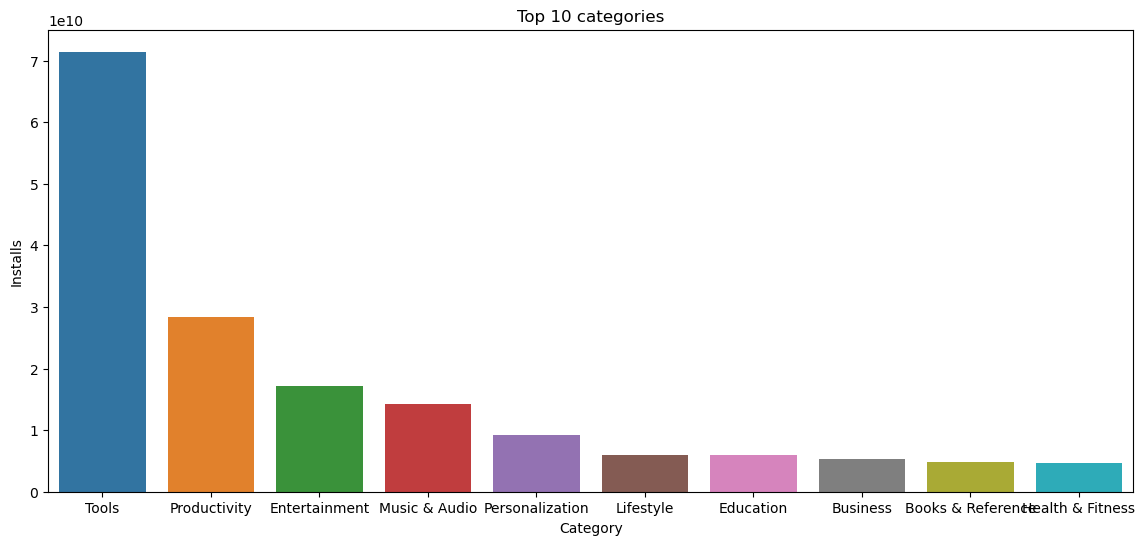

In [10]:
# Generating visualizations
plt.figure(figsize=(14,6))
plt.xlabel("Category")
plt.ylabel("No of Installs")
plt.title('Top 10 categories')
sns.barplot(x=top_installs.Category,y=top_installs.Installs)

<Axes: title={'center': 'Top 10 categories'}, xlabel='Category', ylabel='Count'>

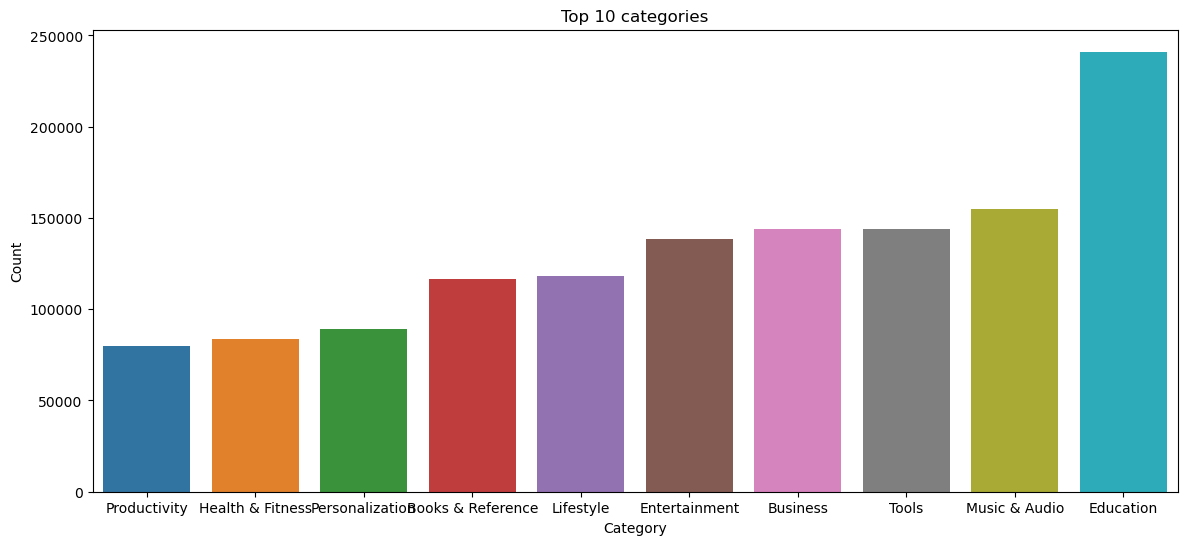

In [11]:
# Generating visualizations
plt.figure(figsize=(14,6))
plt.xlabel("Category")
plt.ylabel("No of Installs")
plt.title('Top 10 categories')
sns.barplot(x=top_installs.Category,y=top_installs.Count,order=top_installs.sort_values('Count').Category)

<Axes: title={'center': 'Top 10 categories'}, xlabel='Category', ylabel='Count'>

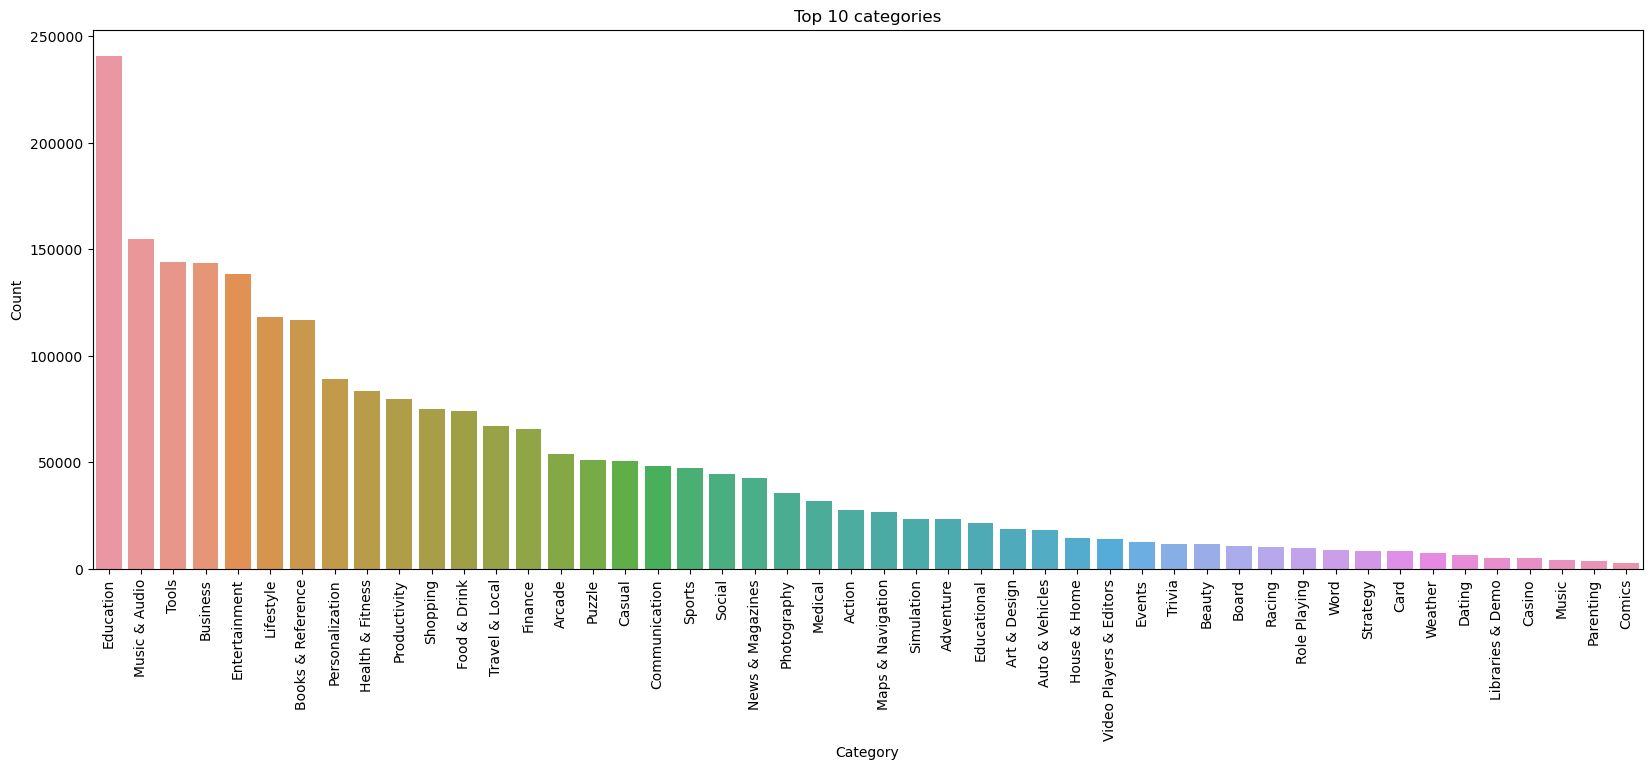

In [12]:
# Generating visualizations
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("No of Installs")
plt.title('Top 10 categories')
sns.barplot(x=top_category_installs.Category,y=top_category_installs.Count)

<Axes: title={'center': 'Categories based on no of installs'}, xlabel='Category', ylabel='Installs'>

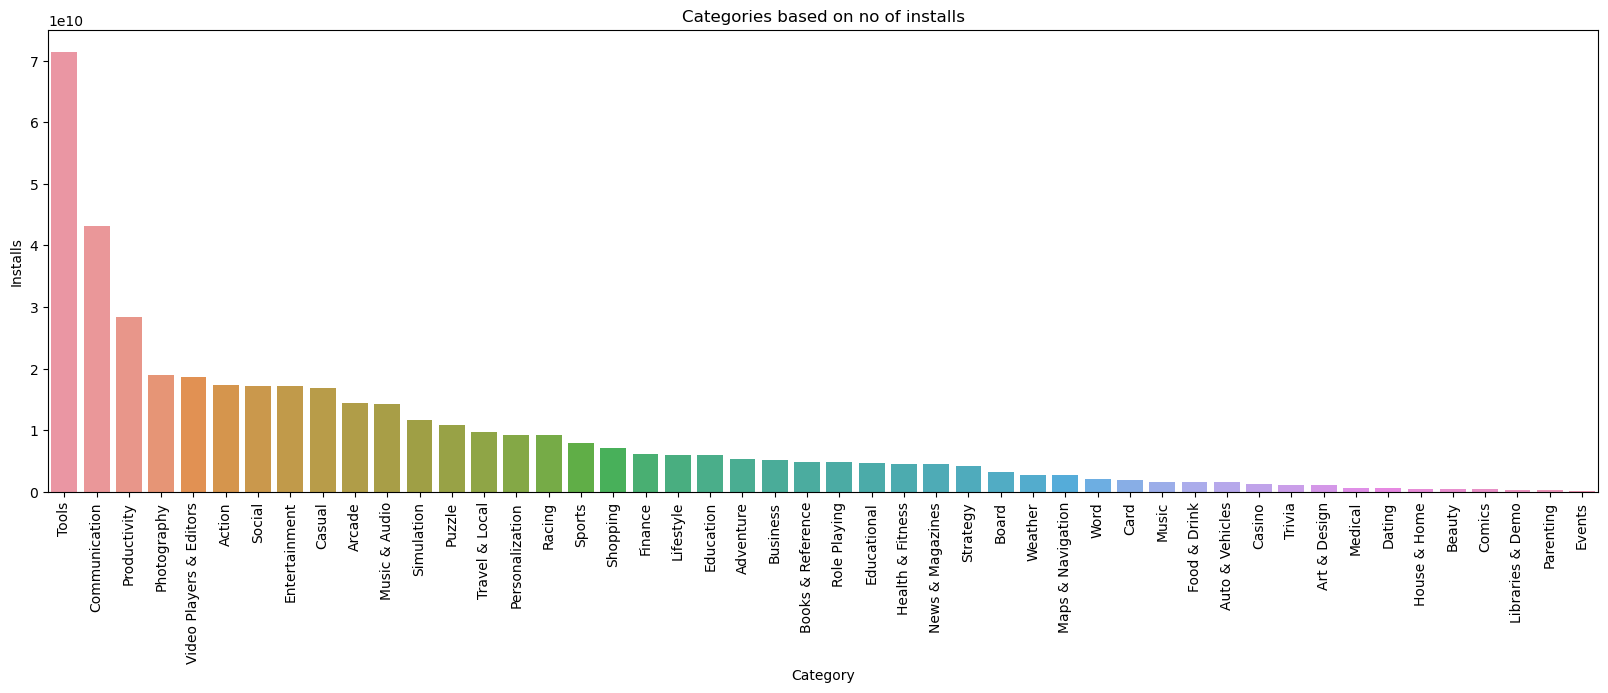

In [13]:
# Generating visualizations
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('No of installs')
plt.title('Categories based on no of installs')
sns.barplot(x=top_category_installs['Category'],y=top_category_installs['Installs'],order=top_category_installs.sort_values('Installs',ascending= False).Category)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, 'Education'),
  Text(1, 0, 'Music & Audio'),
  Text(2, 0, 'Tools'),
  Text(3, 0, 'Business'),
  Text(4, 0, 'Entertainment'),
  Text(5, 0, 'Lifestyle'),
  Text(6, 0, 'Books & Reference'),
  Text(7, 0, 'Personalization'),
  Text(8, 0, 'Health & Fitness'),
  Text(9, 0, 'Productivity'),
  Text(10, 0, 'Shopping'),
  Text(11, 0, 'Food & Drink'),
  Text(12, 0, 'Travel & Local'),
  Text(13, 0, 'Finance'),
  Text(14, 0, 'Arcade'),
  Text(15, 0, 'Puzzle'),
  Text(16, 0, 'Casual'),
  Text(17, 0, 'Communication'),
  Text(18, 0, 'Sports'),
  Text(19, 0, 'Social'),
  Text(20, 0, 'News & Magazines'),
  Text(21, 0, 'Photography'),
  Text(22, 0, 'Medical'),
  Text(23, 0, 'Action'),
  Text(24, 0, 'Maps & Navigation')

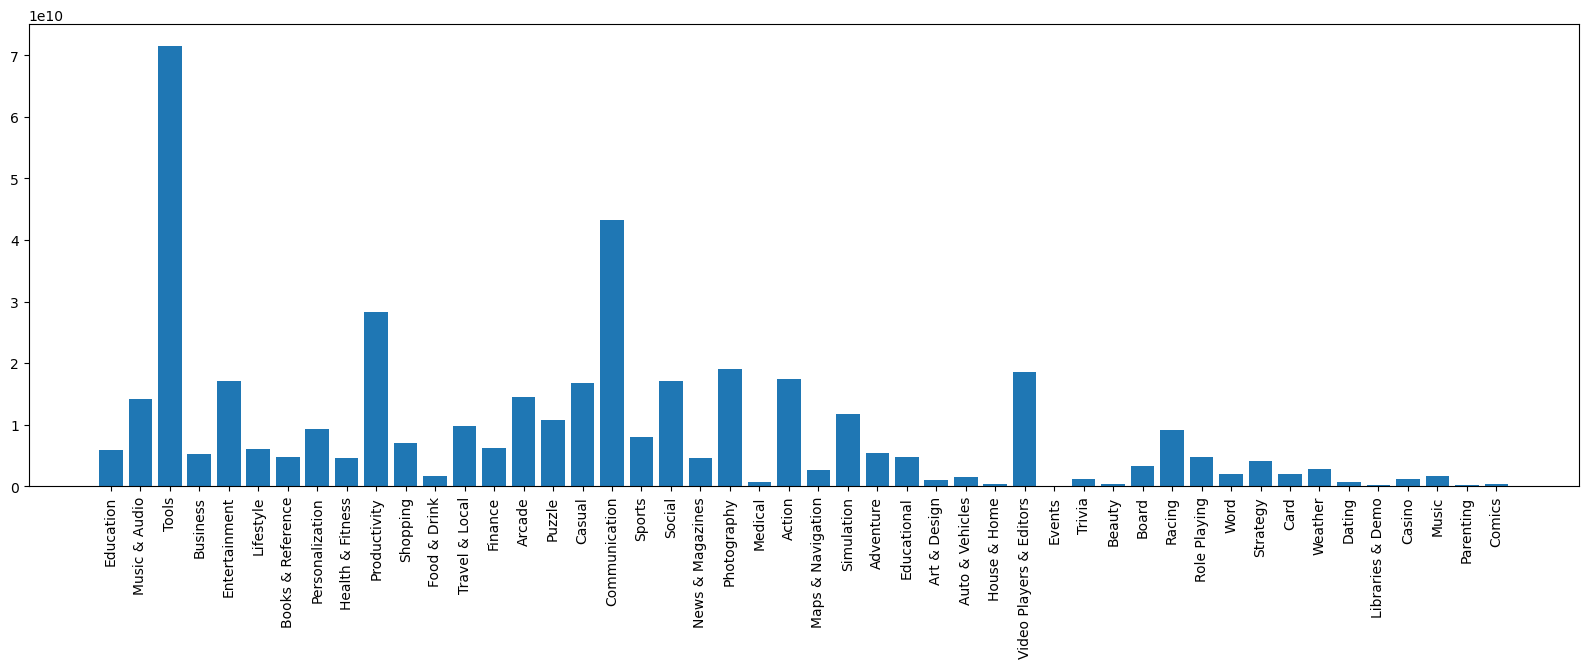

In [14]:
# Generating visualizations
plt.figure(figsize=(20,6))
plt.bar(x=top_category_installs.Category,height=top_category_installs.Installs)
plt.xticks(rotation=90)

/var/folders/2z/f04fg9l13lvdkltmz_nd_9_h0000gn/T/ipykernel_1519/3699599474.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df.Rating, color="Blue", shade = True)


Text(0.5, 1.0, 'Distribution of Rating')

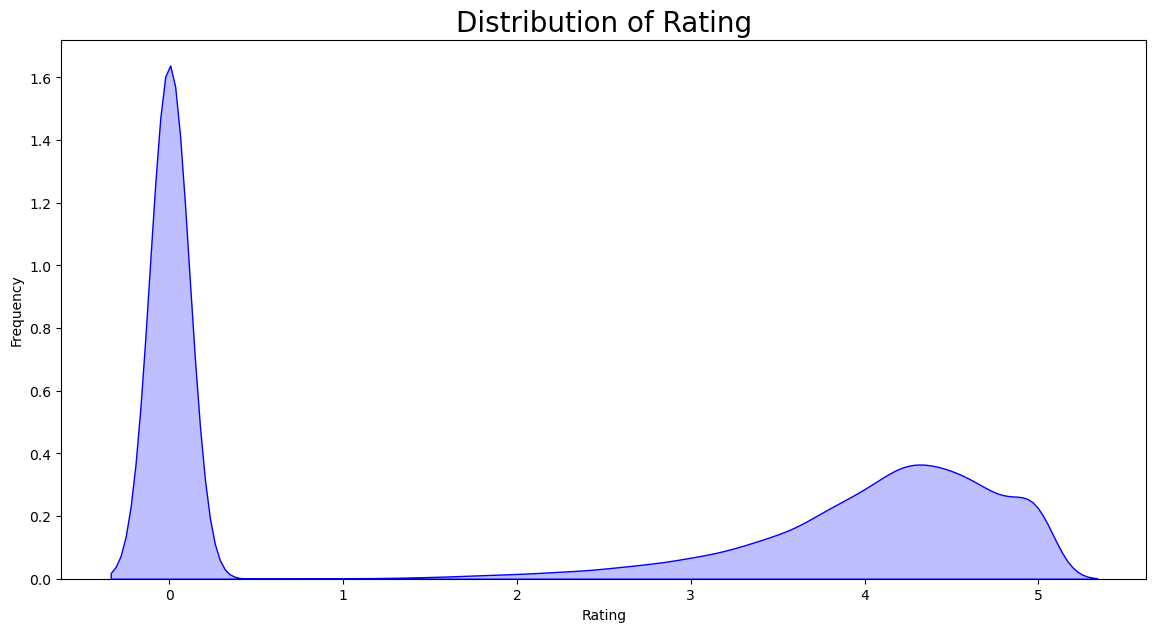

In [15]:
# Generating visualizations
plt.figure(figsize=(14,7))
g = sns.kdeplot(df.Rating, color="Blue", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

<Axes: title={'center': 'Hist'}, xlabel='Rating', ylabel='Count'>

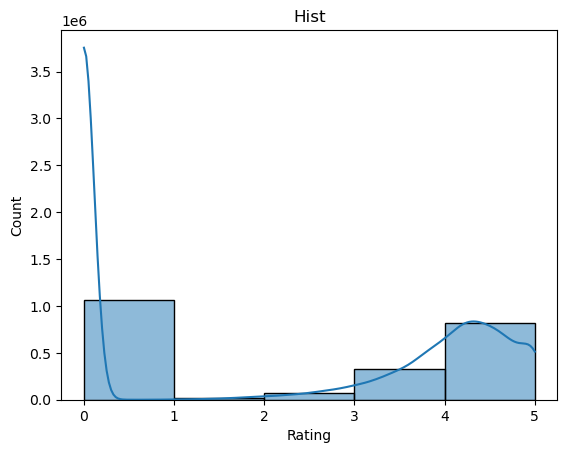

In [16]:
# Generating visualizations
plt.title('Hist')
sns.histplot(df['Rating'],kde=True,bins= 5)

<Axes: title={'center': 'Rating'}, xlabel='Rating', ylabel='Count'>

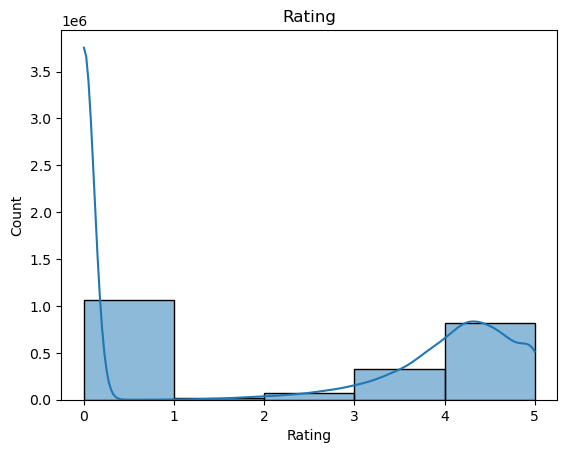

In [17]:
# Generating visualizations
plt.title("Rating")
sns.histplot(df.Rating,kde=True,bins=5)

<Axes: xlabel='Category', ylabel='Rating'>

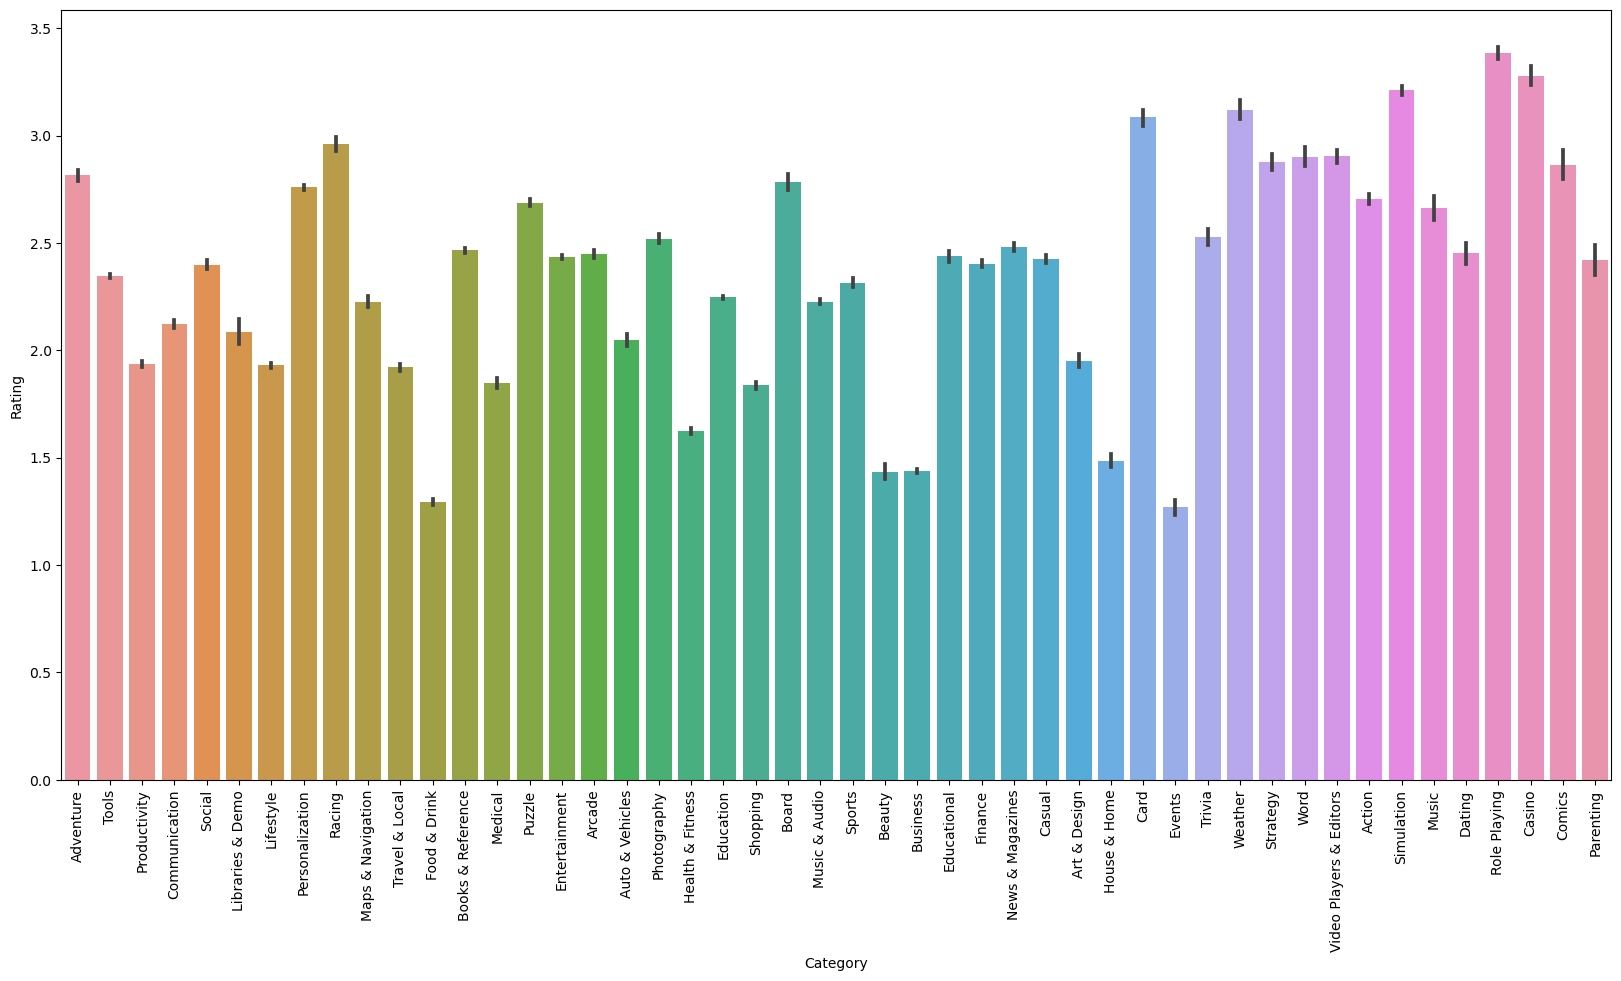

In [8]:
# Generating visualizations
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(x=df.Category,y=df.Rating)

In [1]:
# Executing a data analysis step
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset into a DataFrame
df=pd.read_csv('Playstore final')

In [17]:
# Executing a data analysis step
df['Rating Count'].unique()

array([0.0000e+00, 6.4000e+01, 5.0000e+00, ..., 8.7553e+04, 7.5960e+04,
       7.8351e+04])

In [15]:
# Executing a data analysis step
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'App Name', 'App Id', 'Category',
       'Rating', 'Rating Count', 'Installs', 'Minimum Installs',
       'Maximum Installs', 'Price', 'Currency', 'Size', 'Minimum Android',
       'Developer Id', 'Developer Website', 'Developer Email', 'Released',
       'Last Updated', 'Content Rating', 'Privacy Policy', 'Ad Supported',
       'In App Purchases', 'Editors Choice', 'Scraped Time', 'Type',
       'Rating Type'],
      dtype='object')

<Axes: xlabel='Maximum Installs', ylabel='Rating Count'>

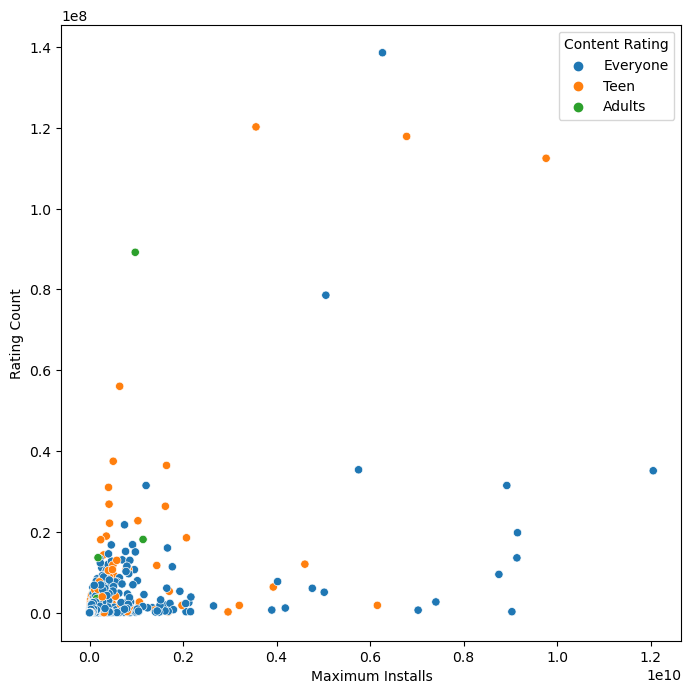

In [20]:
# Generating visualizations
plt.figure(figsize=(8,8))
sns.scatterplot(x='Maximum Installs',y='Rating Count',data=df,hue='Content Rating')

In [63]:
# Aggregating and summarizing data
app_count=df.groupby(['Category','Type'])['App Name'].count().reset_index().rename(columns={'App Name':'Count','index':'App Name'})
app_count

,Category,Type,Count
0,Action,Paid,27539
1,Adventure,Paid,23193
2,Arcade,Paid,53779
3,Art & Design,Paid,18536
4,Auto & Vehicles,Paid,18276
5,Beauty,Paid,11771
6,Board,Paid,10587
7,Books & Reference,Paid,116716
8,Business,Paid,143749
9,Card,Paid,8175


In [70]:
# Executing a data analysis step
df_app_count= app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()
df_app_count

/var/folders/2z/f04fg9l13lvdkltmz_nd_9_h0000gn/T/ipykernel_929/1020979084.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_app_count= app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()


Type,Category,Paid
0,Action,27539
1,Adventure,23193
2,Arcade,53779
3,Art & Design,18536
4,Auto & Vehicles,18276
5,Beauty,11771
6,Board,10587
7,Books & Reference,116716
8,Business,143749
9,Card,8175


<Axes: xlabel='Category'>

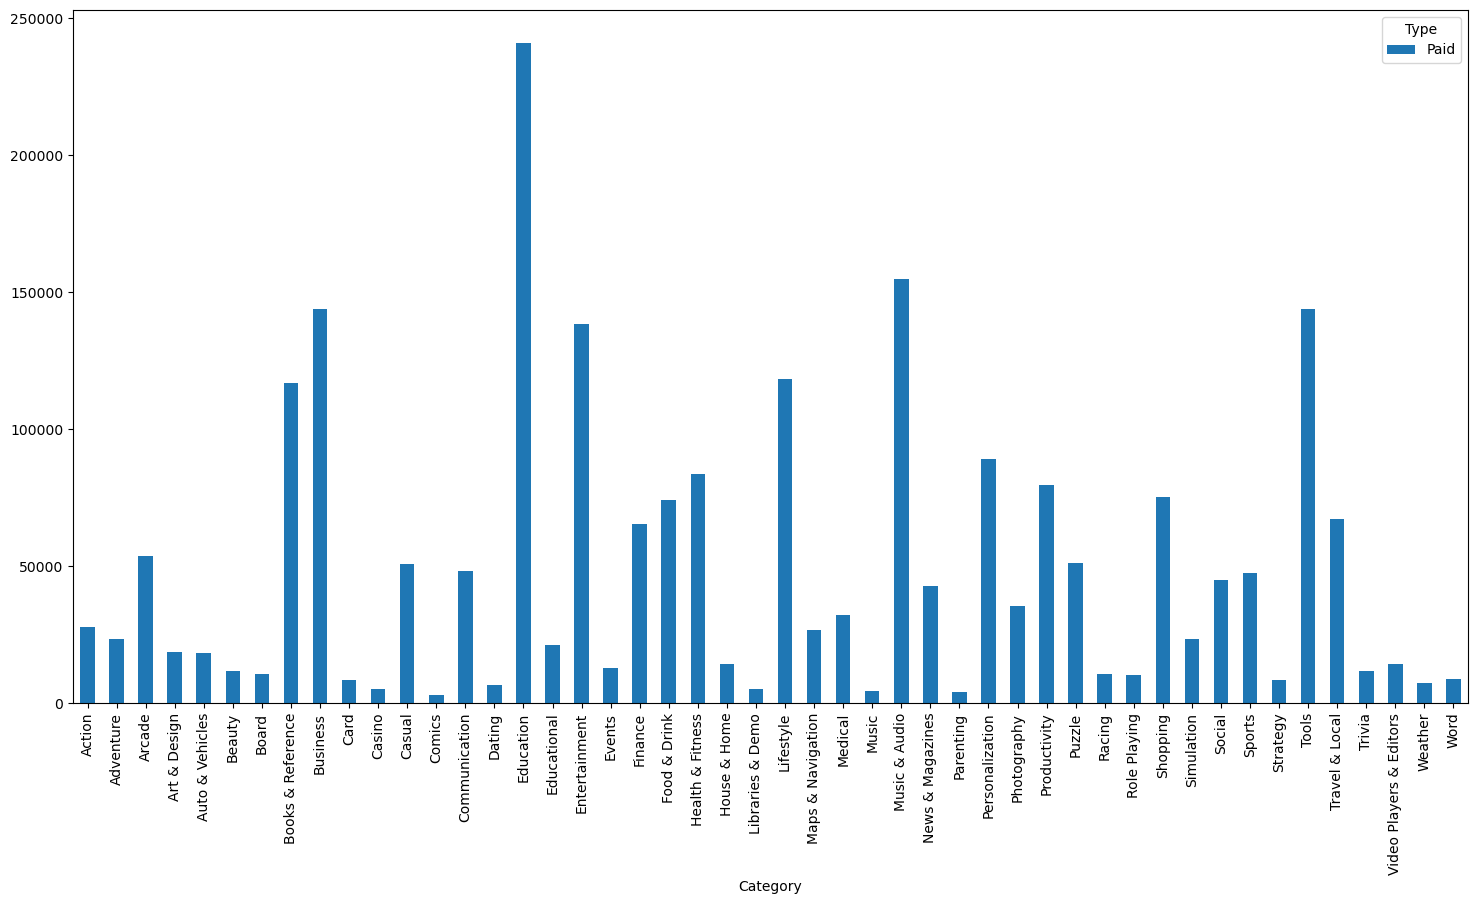

In [87]:
# Executing a data analysis step
df_app_count.set_index('Category').plot(kind='bar',stacked=True,figsize=(18,9))

<Axes: xlabel='Category', ylabel='Paid'>

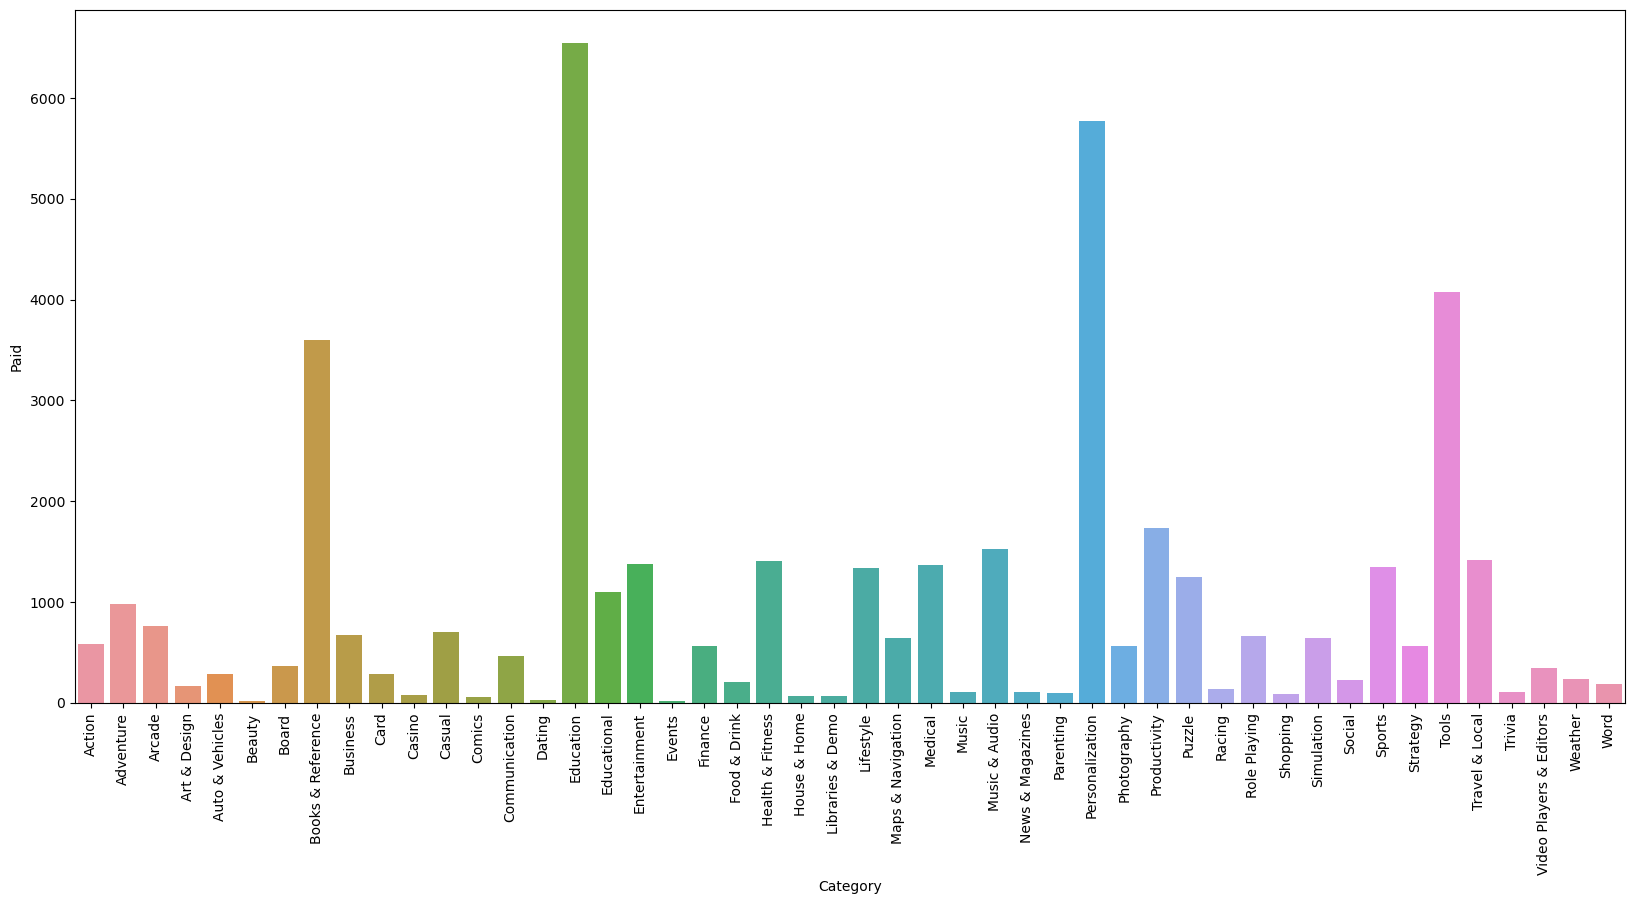

In [138]:
# Generating visualizations
plt.figure(figsize=(20,9))
plt.xticks(rotation=90)
sns.barplot(x=df_app_count1['Category'],y=df_app_count1['Paid'])

Text(0.5, 1.0, 'Free and Paid Apps in Category')

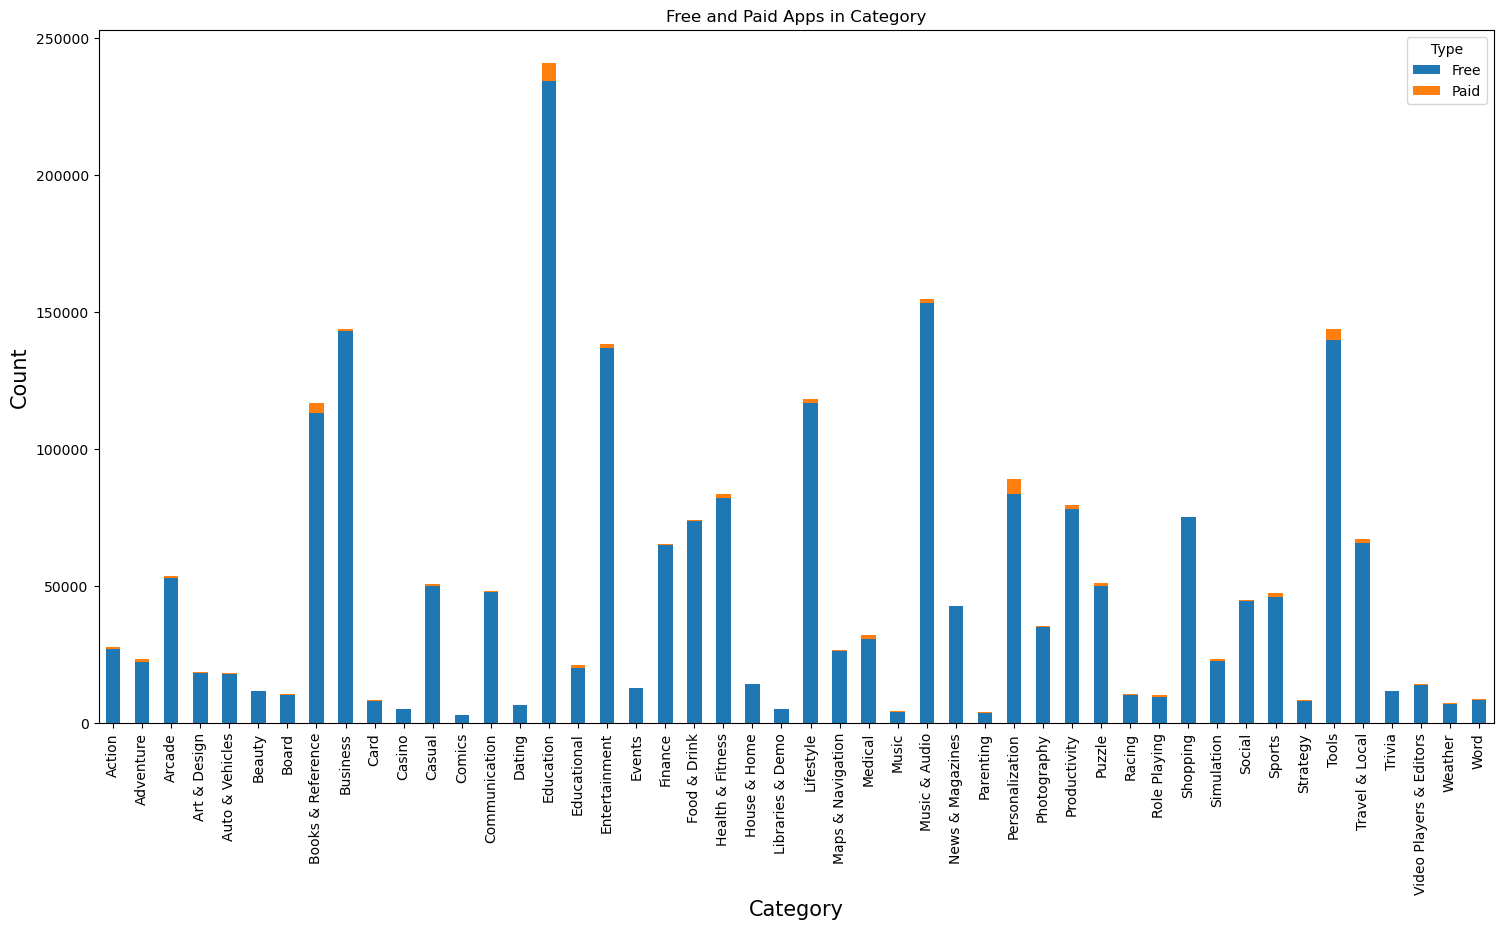

In [136]:
# Generating visualizations
df_app_count1.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9)) # try df_app_count.plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Free and Paid Apps in Category")

In [131]:
# Aggregating and summarizing data
app_count1=df1.groupby(['Category','Type'])['App Name'].count().reset_index().rename(columns={'App Name':'Count','index':'App Name'})
app_count

,Category,Type,Count
0,Action,Paid,27539
1,Adventure,Paid,23193
2,Arcade,Paid,53779
3,Art & Design,Paid,18536
4,Auto & Vehicles,Paid,18276
5,Beauty,Paid,11771
6,Board,Paid,10587
7,Books & Reference,Paid,116716
8,Business,Paid,143749
9,Card,Paid,8175


In [132]:
# Executing a data analysis step
df_app_count1= app_count1.pivot('Category', 'Type', 'Count').fillna(0).reset_index()


/var/folders/2z/f04fg9l13lvdkltmz_nd_9_h0000gn/T/ipykernel_929/4005135729.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_app_count1= app_count1.pivot('Category', 'Type', 'Count').fillna(0).reset_index()


In [133]:
# Executing a data analysis step
df1.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [3]:
# Executing a data analysis step
df['Installs'].min()

0

In [4]:
# Executing a data analysis step
df['Installs'].max()

10000000000

In [27]:
# Aggregating and summarizing data
category_type_installs=df.groupby(['Category','Type'])['Installs'].sum().reset_index()

In [40]:
# Executing a data analysis step
category_type_installs['log_installs']=np.log10(category_type_installs['Installs'])
category_type_installs

,Category,Type,Installs,log_installs
0,Action,Free,17344854020,10.239171
1,Action,Paid,55001308,7.740373
2,Adventure,Free,5368844127,9.729881
3,Adventure,Paid,21264729,7.327660
4,Arcade,Free,14470221308,10.160475
...,...,...,...,...
91,Video Players & Editors,Paid,4334037,6.636893
92,Weather,Free,2771057819,9.442646
93,Weather,Paid,2742243,6.438106
94,Word,Free,2026453025,9.306737


In [16]:
# Executing a data analysis step
df['Type'].unique()

array(['Paid'], dtype=object)

In [23]:
# Executing a data analysis step
df1.to_csv('Finalpl')

In [24]:
# Loading dataset into a DataFrame
df=pd.read_csv('Finalpl')

In [33]:
# Executing a data analysis step
np.log10(10000)

4.0

<Axes: xlabel='Category', ylabel='log_installs'>

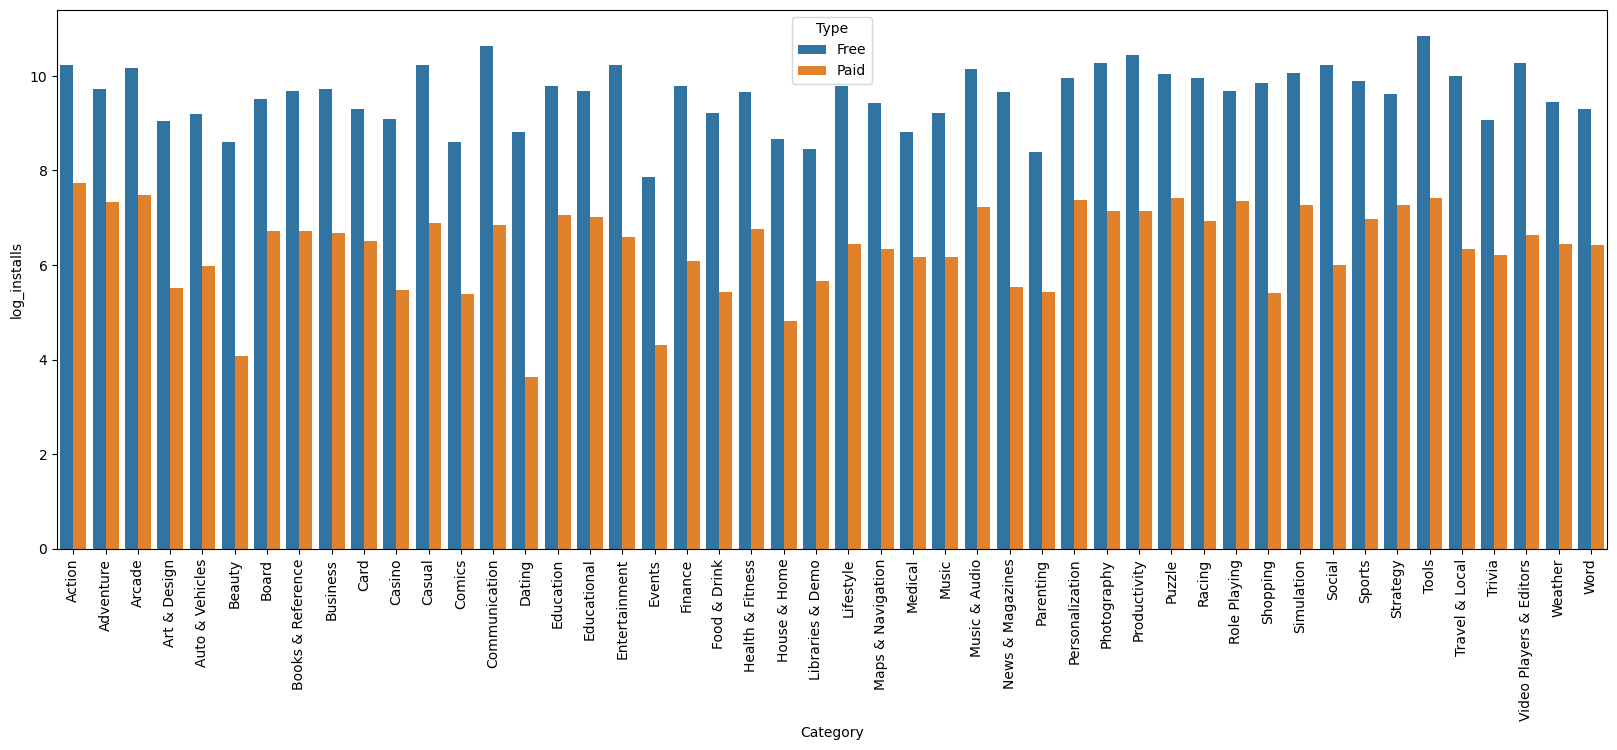

In [39]:
# Generating visualizations
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.barplot(x='Category',y='log_installs',data=category_type_installs,hue='Type')

In [61]:
# Executing a data analysis step
df[['Category','App Name','log_Installs']].tail(50)

,Category,App Name,log_Installs
2312500,Education,Learn Hindi Quickly Through English,2.00000
2312501,Maps & Navigation,FAIRTIQ,5.00000
2312502,Finance,GAT,2.00000
2312503,Travel & Local,"IPlace - Share, store places, travel guide system",2.00000
2312504,Shopping,AppBundle,1.00000
2312505,Books & Reference,Class 9 Nepali Book Offline,3.00000
2312506,Food & Drink,Ice Cream Cake Recipe,3.00000
2312507,Business,Helperoo Crew App,1.00000
2312508,Travel & Local,Wheel King Trans Haul App,2.00000
2312509,Music & Audio,Kenia Os - Roast Yourself,3.69897


In [65]:
# Executing a data analysis step
df['log_Installs1'] = np.log10(category_type_installs['Installs'])

In [51]:
# Executing a data analysis step
df.head(20)

,Unnamed: 0.1,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,...,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Type,log_Installs
0,0,0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10.0,15,...,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,Free,10.239171
1,1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000.0,7662,...,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,Free,7.740373
2,2,2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50.0,58,...,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,Free,9.729881
3,3,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10.0,19,...,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35,Free,7.327660
4,4,4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100.0,478,...,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,Free,10.160475
5,5,5,IMOCCI,com.imocci,Social,0.0,0.0,50,50.0,89,...,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35,Free,7.491496
6,6,6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,1000,1000.0,2567,...,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35,Free,9.047694
7,7,7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500,500.0,702,...,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,2021-06-15 20:19:35,Free,5.507544
8,8,8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10,10.0,18,...,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35,Free,9.202426
9,9,9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,50000,50000.0,62433,...,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35,Free,5.988204


<Axes: xlabel='Size', ylabel='Installs'>

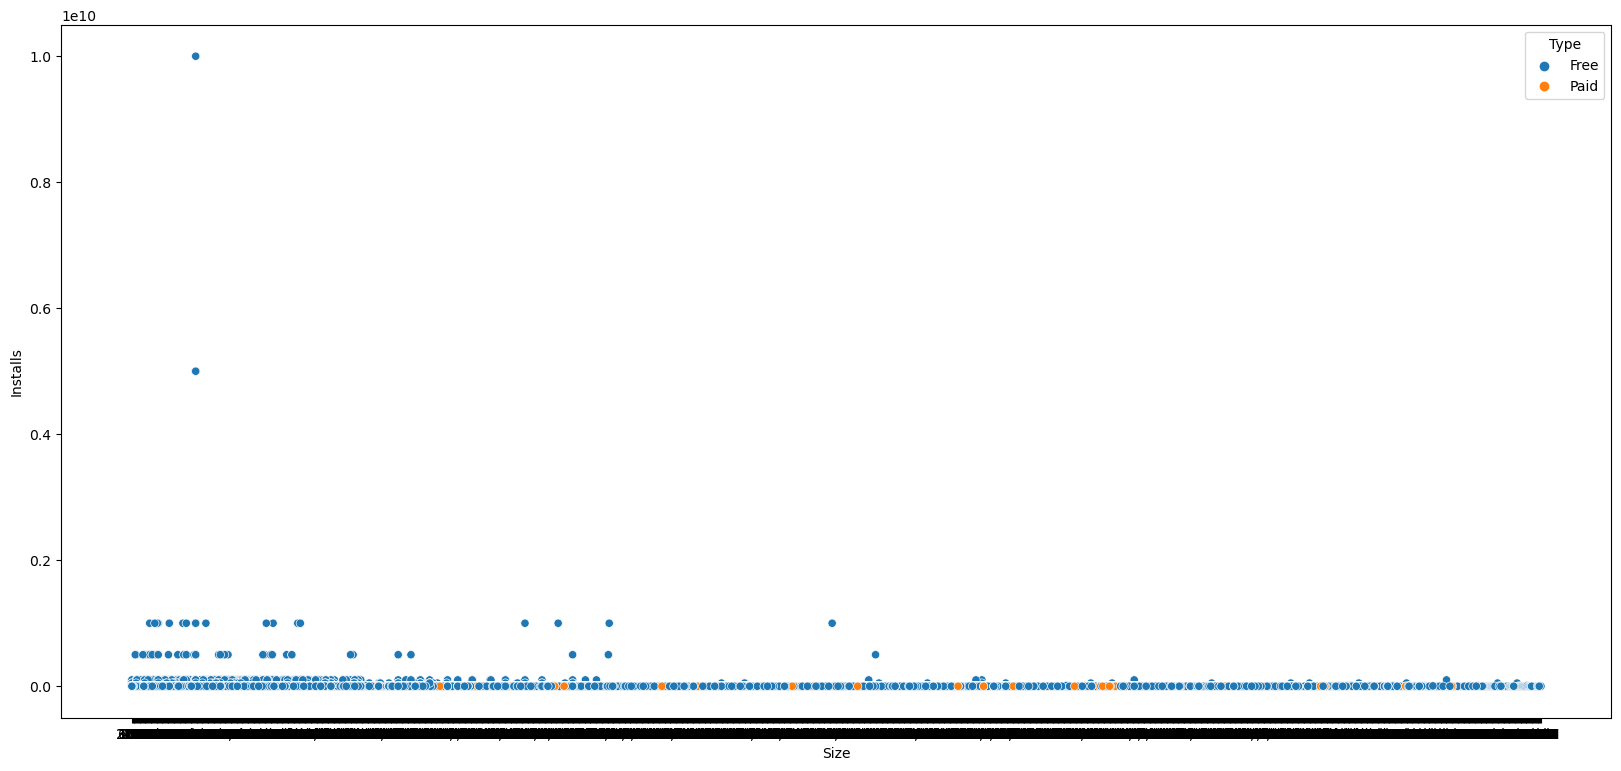

In [68]:
# Generating visualizations
plt.figure(figsize=(20,9))
sns.scatterplot(x='Size',y='Installs',data=df,hue='Type')

In [69]:
# Executing a data analysis step
df.corr()

/var/folders/2z/f04fg9l13lvdkltmz_nd_9_h0000gn/T/ipykernel_5944/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0.1,Unnamed: 0,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Ad Supported,In App Purchases,Editors Choice,log_Installs,log_Installs1
Unnamed: 0.1,1.000000,1.000000,-0.000604,0.000179,0.001141,0.001141,0.001067,0.000406,-0.000776,-0.000635,0.000279,-0.000044,0.064170
Unnamed: 0,1.000000,1.000000,-0.000604,0.000179,0.001141,0.001141,0.001067,0.000406,-0.000776,-0.000635,0.000279,-0.000044,0.064170
Rating,-0.000604,-0.000604,1.000000,0.013038,0.011215,0.011215,0.012615,-0.003674,0.160504,0.153823,0.019485,0.638787,-0.023632
Rating Count,0.000179,0.000179,0.013038,1.000000,0.545281,0.545281,0.547571,-0.000411,0.005294,0.025737,0.137311,0.047381,0.076834
Installs,0.001141,0.001141,0.011215,0.545281,1.000000,1.000000,0.954037,-0.000461,0.002249,0.014178,0.059932,0.045599,0.077248
Minimum Installs,0.001141,0.001141,0.011215,0.545281,1.000000,1.000000,0.954037,-0.000461,0.002249,0.014178,0.059932,0.045599,0.077248
Maximum Installs,0.001067,0.001067,0.012615,0.547571,0.954037,0.954037,1.000000,-0.000515,0.002881,0.016100,0.064206,0.050113,0.079792
Price,0.000406,0.000406,-0.003674,-0.000411,-0.000461,-0.000461,-0.000515,1.000000,-0.034281,-0.002636,0.000503,-0.021737,NaN
Ad Supported,-0.000776,-0.000776,0.160504,0.005294,0.002249,0.002249,0.002881,-0.034281,1.000000,0.138304,0.005701,0.249097,0.140935
In App Purchases,-0.000635,-0.000635,0.153823,0.025737,0.014178,0.014178,0.016100,-0.002636,0.138304,1.000000,0.046078,0.244564,-0.021114


In [75]:
# Executing a data analysis step
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [72]:
# Executing a data analysis step
df

,Unnamed: 0.1,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,...,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Type,log_Installs,log_Installs1
0,0,0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10.0,15,...,"Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,Free,1.00000,10.239171
1,1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000.0,7662,...,"May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,Free,3.69897,7.740373
2,2,2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50.0,58,...,"Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,Free,1.69897,9.729881
3,3,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10.0,19,...,"Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35,Free,1.00000,7.327660
4,4,4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100.0,478,...,"Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,Free,2.00000,10.160475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312545,2312545,2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,100000,100000.0,337109,...,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18,Free,5.00000,NaN
2312546,2312546,2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100,100.0,430,...,"Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19,Free,2.00000,NaN
2312547,2312547,2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100,100.0,202,...,"Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19,Free,2.00000,NaN
2312548,2312548,2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000,1000.0,2635,...,"May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19,Free,3.00000,NaN


In [76]:
# Executing a data analysis step
df

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,...,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Type
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10.0,15,0.0,USD,...,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,Free
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000.0,7662,0.0,USD,...,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,Free
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50.0,58,0.0,USD,...,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,Free
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10.0,19,0.0,USD,...,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35,Free
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100.0,478,0.0,USD,...,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312545,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,100000,100000.0,337109,0.0,USD,...,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18,Free
2312546,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100,100.0,430,0.0,USD,...,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19,Free
2312547,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100,100.0,202,0.0,USD,...,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19,Free
2312548,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000,1000.0,2635,0.0,USD,...,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19,Free


/var/folders/2z/f04fg9l13lvdkltmz_nd_9_h0000gn/T/ipykernel_5944/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

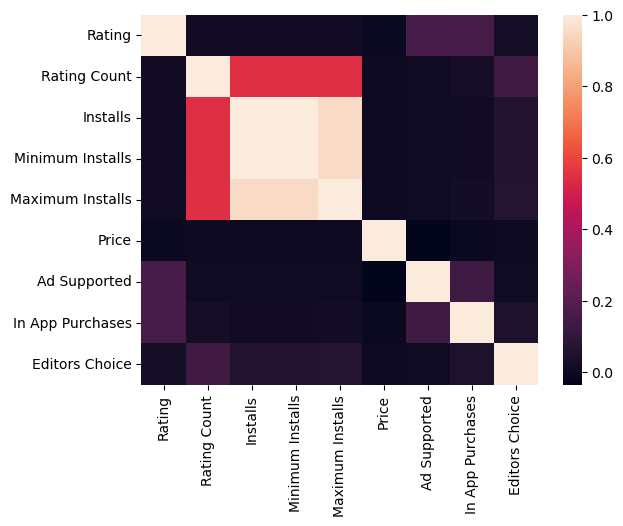

In [79]:
# Generating visualizations
sns.heatmap(df.corr())

/var/folders/2z/f04fg9l13lvdkltmz_nd_9_h0000gn/T/ipykernel_5944/3621298375.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar= True,cmap='coolwarm')


<Axes: >

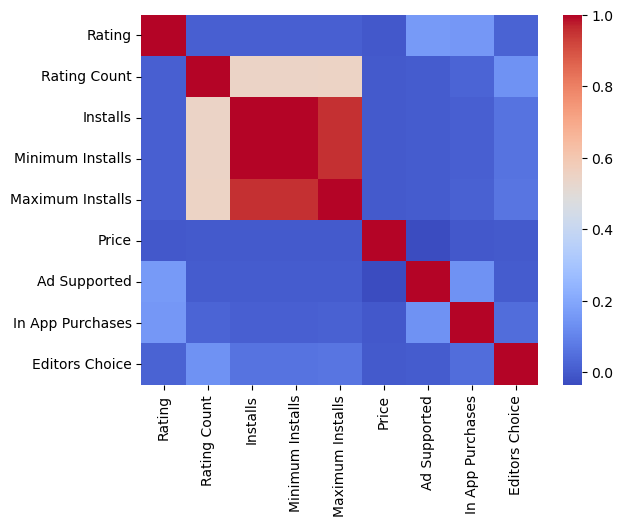

In [83]:
# Generating visualizations
sns.heatmap(df.corr(),cbar= True,cmap='coolwarm')

In [1]:
# Executing a data analysis step
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset into a DataFrame
df=pd.read_csv('finalpl')

In [6]:
# Executing a data analysis step
df['Installs'].max()

10000000000

In [92]:
# Executing a data analysis step
paid_apps=df[(df.Type=='Paid')&(df.Installs>=5000000)]

In [93]:
# Executing a data analysis step
paid_apps

,Unnamed: 0.1,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,...,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Type
6301,6301,6302,True Skate,com.trueaxis.trueskate,Sports,4.4,191460.0,5000000,5000000.0,7040478,...,support.android@trueskate.com,"Jul 19, 2013","Jun 07, 2021",Everyone,http://trueaxis.com/tsspp.html,True,True,False,2021-06-15 20:25:39,Paid
508607,508607,508696,Hitman Sniper,com.squareenixmontreal.hitmansniperandroid,Action,4.4,854992.0,10000000,10000000.0,24958893,...,support@square-enix-montreal.mail.helpshift.com,"Jun 3, 2015","Aug 24, 2020",Mature 17+,http://eu.square-enix.com/en/documents/privacy...,True,True,True,2021-06-16 04:42:58,Paid
837211,837211,837351,Minecraft,com.mojang.minecraftpe,Arcade,4.6,4132618.0,10000000,10000000.0,36183322,...,help@minecraft.net,"Aug 15, 2011","May 27, 2021",Everyone 10+,https://privacy.microsoft.com/en-us/privacysta...,False,True,True,2021-06-16 09:47:13,Paid
1859671,1859671,1859983,Stickman Legends-Shadow Fight Premium Offline ...,com.zitga.ninja.stickman.legends.shadow.wars,Action,4.3,235762.0,10000000,10000000.0,13264461,...,StickmanLegends@zitga.com.vn,"May 10, 2017","Jun 08, 2021",Everyone 10+,https://docs.google.com/document/d/1ZGlKsarN5y...,True,True,False,2021-06-16 06:24:42,Paid
1933411,1933411,1933739,Poweramp Full Version Unlocker,com.maxmpz.audioplayer.unlock,Music & Audio,4.2,55111.0,5000000,5000000.0,5481771,...,poweramp.maxmpz@gmail.com,"Nov 7, 2010","Jan 20, 2020",Everyone,https://www.iubenda.com/privacy-policy/8016901...,False,False,False,2021-06-16 07:28:13,Paid
2052646,2052646,2052997,League of Stickman 2020- Ninja Arena PVP(Dream...,me.dreamsky.stickman,Action,4.1,65269.0,5000000,5000000.0,5621942,...,leagueofstickman@dreamsky.me,"Sep 3, 2016","Dec 30, 2020",Teen,http://www.dreamsky.me/league-of-stickman-priv...,True,True,False,2021-06-16 09:12:31,Paid


In [94]:
# Aggregating and summarizing data
paid_apps=paid_apps.groupby(['App Name'])['Rating'].max().sort_values(ascending= False).reset_index()

In [95]:
# Executing a data analysis step
paid_apps

,App Name,Rating
0,Minecraft,4.6
1,Hitman Sniper,4.4
2,True Skate,4.4
3,Stickman Legends-Shadow Fight Premium Offline ...,4.3
4,Poweramp Full Version Unlocker,4.2
5,League of Stickman 2020- Ninja Arena PVP(Dream...,4.1


<Axes: xlabel='Rating', ylabel='App Name'>

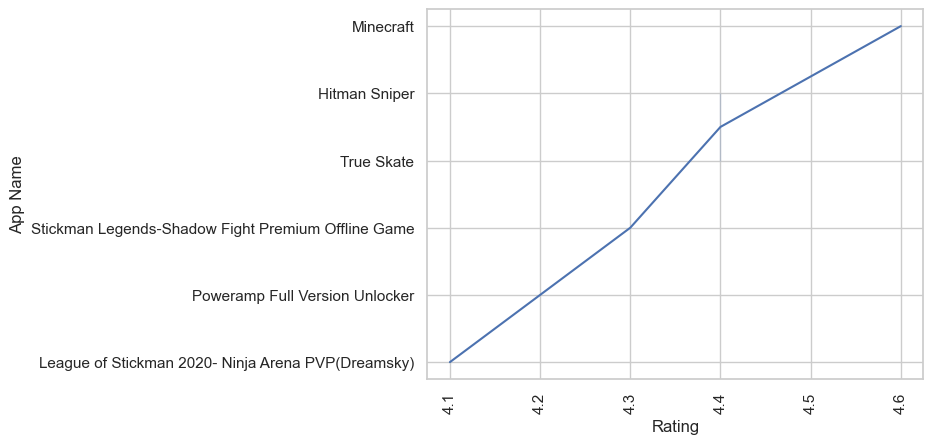

In [96]:
# Generating visualizations
plt.xticks(rotation=90)
sns.set_theme(style='darkgrid')
sns.lineplot(x=paid_apps.Rating,y=paid_apps['App Name'])

In [218]:
# Executing a data analysis step
free_apps=df[(df['Type']=='Free')&(df['Installs']>=5000000)]

In [219]:
# Aggregating and summarizing data
free_apps=free_apps.groupby(['App Name'])['Rating'].max().sort_values(ascending= False).reset_index()
free_apps=free_apps.head(5)

<Axes: xlabel='Rating', ylabel='App Name'>

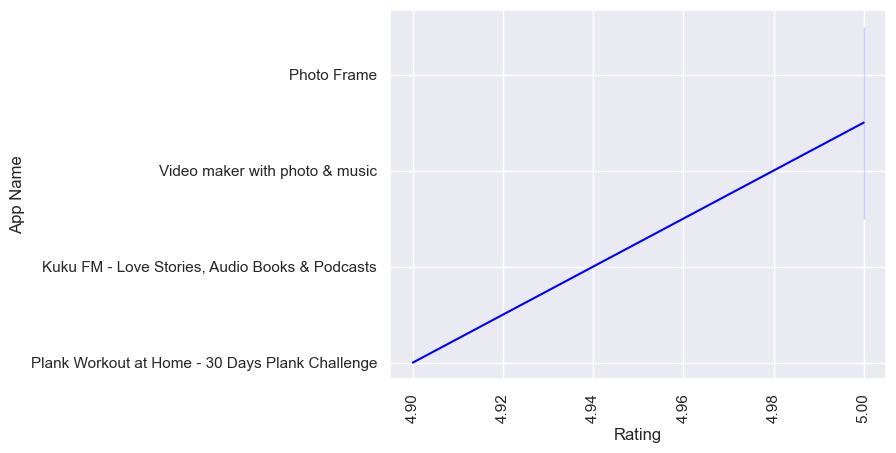

In [220]:
# Generating visualizations
plt.xticks(rotation=90)
sns.set_theme(style='darkgrid')
sns.lineplot(x=free_apps.Rating,y=free_apps['App Name'],color='blue')

In [15]:
# Aggregating and summarizing data
plt.figure(figsize=(8,6))
data=df.groupby(['Category'])['Maximum Installs'].max().sort_values(ascending=True).reset_index()
data=data.head(10)
data

,Category,Maximum Installs
0,Events,14691214
1,Medical,18243473
2,Parenting,36058501
3,Beauty,53849836
4,Libraries & Demo,76374212
5,Comics,85170436
6,Casino,95406186
7,House & Home,96444714
8,Word,110758785
9,Card,129283628


<Figure size 800x600 with 0 Axes>

In [13]:
# Executing a data analysis step
labels=data.Category

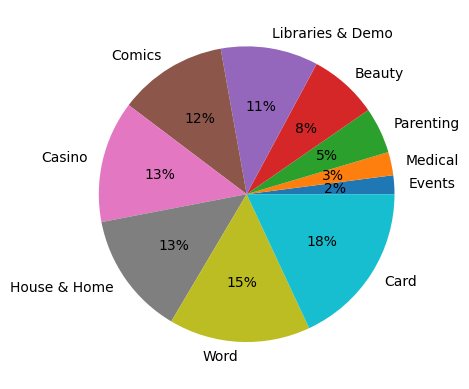

In [23]:
# Generating visualizations
plt.pie(data['Maximum Installs'],labels=labels,autopct='%.0f%%')
plt.show()

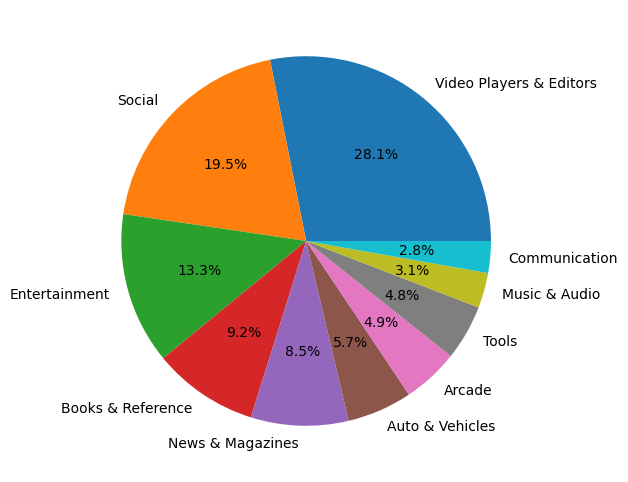

In [58]:
# Aggregating and summarizing data
data=df1[(df1['Content Rating']=='Teen')]
data=data.groupby(['Category'])['Maximum Installs'].max().sort_values(ascending=False).reset_index()
data=data.head(10)
plt.figure(figsize=(8,6))
plt.pie(data['Maximum Installs'],labels=data.Category,autopct='%.1f%%')
plt.show()

In [41]:
# Aggregating and summarizing data
data=df1[df1['Content Rating']=='Adults']
data=data.groupby(['Category'])['Maximum Installs'].max().sort_values(ascending=True).reset_index()
data=data.head(10)

Text(0.5, 1.0, 'Adults Installing apps in terms of category')

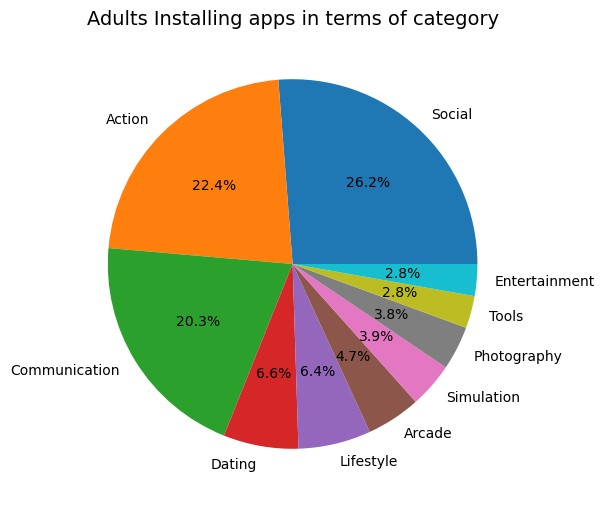

In [48]:
# Aggregating and summarizing data
plt.figure(figsize=(8,6))
Adult = df1[(df1['Content Rating']=='Adults')]
Adult = Adult.groupby(['Category'])['Maximum Installs'].max().sort_values(ascending=False)
Adult = Adult.head(10)
labels = Adult.keys()
plt.pie(x = Adult, autopct="%.1f%%", labels=labels)
plt.title("Adults Installing apps in terms of category", fontsize=14)

In [54]:
# Executing a data analysis step
data.head(10)

,Category,Maximum Installs
0,Educational,656714
1,Parenting,1209459
2,Events,1559211
3,Business,2358159
4,Libraries & Demo,3493395
5,Auto & Vehicles,3792520
6,Beauty,3843911
7,Education,4674030
8,Card,5207371
9,Medical,5577176


In [56]:
# Executing a data analysis step
Adult.head(10)

Category
Social           1144061939
Action            976536041
Communication     885977963
Dating            286283642
Lifestyle         277159841
Arcade            207046918
Simulation        172102967
Photography       167433825
Tools             123134819
Entertainment     121412798
Name: Maximum Installs, dtype: int64

# 5. Key Findings
### 5.1 Insights Gathered
- **Most apps have ratings between 4.0 and 4.5**, showing overall positive user reception.
- **Free apps dominate the Play Store**, but **paid apps tend to receive slightly better ratings**.
- **'Games' and 'Tools' categories have the highest number of apps**, making them the most competitive categories.
- **Apps with more reviews have higher downloads**, emphasizing the importance of user engagement.

### 5.2 Future Recommendations
- **Leverage user engagement** by encouraging reviews and ratings to boost app popularity.
- **Improve paid app marketing** to highlight premium features that justify their cost.
- **Enhance sentiment analysis** using advanced machine learning models for deeper user insights.

## 6. Conclusion
This analysis provides **valuable insights into Google Play Store trends, user engagement, and app success factors**. By leveraging these findings, app developers and marketers can **optimize their strategies, enhance app quality, and increase user satisfaction**. Future research could explore **predictive modeling for app success and segmentation of users based on preferences** to further refine app development strategies.

